<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [38]:
## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [39]:
# insert code here
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [40]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [57]:
X = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [58]:
y = pd.DataFrame(diabetes['target'], columns=['target'])
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Prepare input data

In [43]:
# insert code here

### Split the data (training/test)

In [59]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Create the model's architecture

In [60]:
from keras.engine.sequential import Sequential
model = Sequential()

In [61]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (X.shape[1], )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [62]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1100      
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [63]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [64]:
%%time
# insert code here
fitted_model = model.fit(
    X_train.to_numpy(),
    y_train.to_numpy(),
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 29506.1152 - mse: 29506.1152 - val_loss: 31468.2305 - val_mse: 31468.2305
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 29427.0215 - mse: 29427.0215 - val_loss: 31360.4297 - val_mse: 31360.4297
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 29291.0996 - mse: 29291.0996 - val_loss: 31172.9160 - val_mse: 31172.9160
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 29058.1133 - mse: 29058.1152 - val_loss: 30859.7754 - val_mse: 30859.7754
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 28691.9688 - mse: 28691.9688 - val_loss: 30368.1211 - val_mse: 30368.1211
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 28117.4414 - mse: 28117.4414 - val_loss: 29654.4902 - val_mse: 29654.4902
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 27317.4688 - mse: 27317.4688 - val_loss: 2865

12/12 [==============================] - 0s 4ms/step - loss: 3153.1143 - mse: 3153.1143 - val_loss: 3126.6223 - val_mse: 3126.6223
Epoch 58/100
12/12 [==============================] - 0s 4ms/step - loss: 3143.4224 - mse: 3143.4224 - val_loss: 3108.6758 - val_mse: 3108.6758
Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 3135.4241 - mse: 3135.4241 - val_loss: 3094.4644 - val_mse: 3094.4644
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 3124.1780 - mse: 3124.1780 - val_loss: 3102.1135 - val_mse: 3102.1135
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 3114.3398 - mse: 3114.3398 - val_loss: 3081.9194 - val_mse: 3081.9194
Epoch 62/100
12/12 [==============================] - 0s 4ms/step - loss: 3105.1729 - mse: 3105.1729 - val_loss: 3080.0449 - val_mse: 3080.0449
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 3099.9546 - mse: 3099.9546 - val_loss: 3088.6326 - val_mse: 3088.6328
Epoch

### Create predictions

In [65]:
# insert code here
predictions = model.predict(X_test)


In [66]:
predictions

array([[100.92258 ],
       [ 94.16466 ],
       [179.1024  ],
       [ 61.135662],
       [175.00056 ],
       [191.9864  ],
       [221.59525 ],
       [133.73317 ],
       [159.76378 ],
       [126.55774 ],
       [193.14925 ],
       [188.01097 ],
       [ 94.97064 ],
       [ 68.82202 ],
       [225.62097 ],
       [203.06831 ],
       [179.23268 ],
       [ 91.15123 ],
       [128.76079 ],
       [163.88112 ],
       [195.36452 ],
       [ 89.77971 ],
       [137.03897 ],
       [ 93.73338 ],
       [ 83.76987 ],
       [200.11127 ],
       [ 92.42101 ],
       [163.19116 ],
       [131.32726 ],
       [184.87851 ],
       [157.33766 ],
       [126.92186 ],
       [170.34862 ],
       [ 91.30972 ],
       [149.67545 ],
       [186.44937 ],
       [ 95.42868 ],
       [232.9124  ],
       [167.72795 ],
       [181.08672 ],
       [156.17717 ],
       [179.80359 ],
       [123.36905 ],
       [125.75117 ],
       [130.75536 ],
       [204.12517 ],
       [131.55794 ],
       [129.2

In [67]:
len(predictions)

133

### Evaluate the model

In [68]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test RMSE: %.6f' % tuple(np.sqrt(score)))

1/1 [==============================] - 0s 59ms/step - loss: 2896.1748 - mse: 2896.1748

Test loss: 53.816120, Test RMSE: 53.816120


### Visualisation of cost

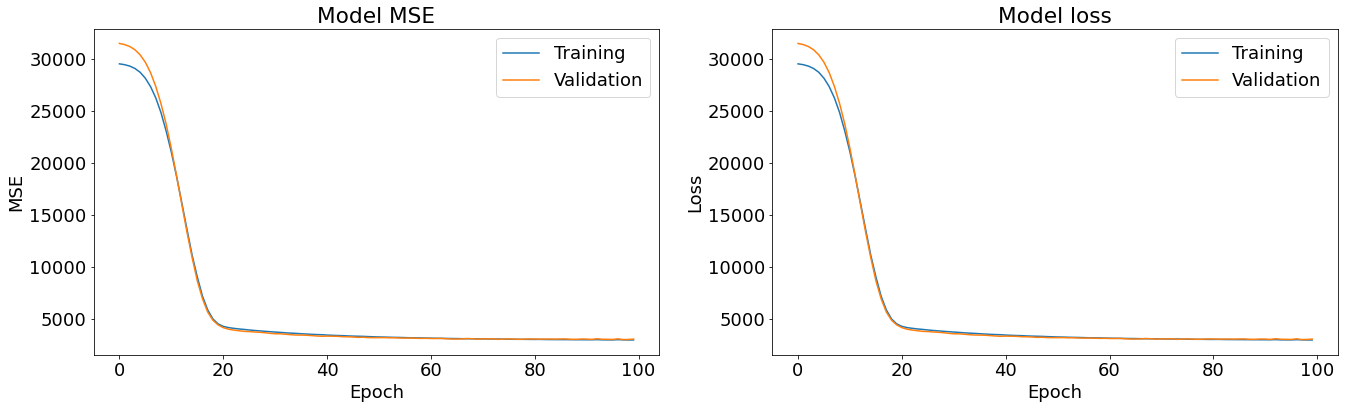

In [69]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['mse'], label = 'Training')
ax[0].plot(fitted_model.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'], label = 'Training')
ax[1].plot(fitted_model.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

© 2020 Institute of Data